<a href="https://colab.research.google.com/github/mhaidar10/machine-leaning-pemula-dc/blob/main/01_Supervised_dan_Unsupervised_Learning/01_Latihan_SKLearn_Decision__Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supervised : Classification**

Tujuan :

Melakukan klasifikasi data dengan teknik Decision Tree menggunakan dataset iris,dengan 150 sample

dataset src: https://www.kaggle.com/datasets/uciml/iris

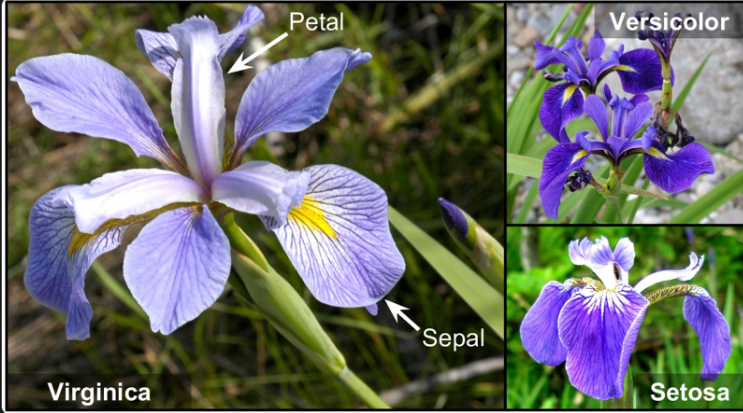

In [49]:
import pandas as pd

# Membaca file iris.csv
iris = pd.read_csv('Iris.csv')

In [50]:
# Melihat informasi dataset
iris.info()

# melihat informasi dataset pada 5 baris pertama
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [51]:
# menghilangkan kolom yang tidak penting (#drop id)
iris.drop('Id',axis=1,inplace=True)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [52]:
# memisahkan atribut dan label
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]] #atribut
y = iris['Species'] #label

# Membagi dataset menjadi data latih & data uji
from sklearn.model_selection import train_test_split
#train 99% test 1%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [53]:
from sklearn.tree import DecisionTreeClassifier

# membuat model Decision Tree
tree_model = DecisionTreeClassifier()

# Melatih model dengan menggunakan data latih
tree_model = tree_model.fit(X_train, y_train)

In [54]:
# Evaluasi Model
from sklearn.metrics import accuracy_score

y_pred = tree_model.predict(X_test)

acc_secore = round(accuracy_score(y_pred, y_test), 3)

print('Accuracy: ', acc_secore)

Accuracy:  0.933


mencoba model yang telah kita buat untuk memprediksi spesies dari sebuah bunga Iris.

In [55]:
# prediksi model dengan tree_model.predict([[SepalLength, SepalWidth, PetalLength, PetalWidth]])
print(tree_model.predict([[6.2, 3.4, 5.4, 2.3]])[0])

#hasil = Iris-virginica

Iris-virginica


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


melihat visualisasi dari decision tree yang kita buat terhadap data menggunakan **library Graphviz**

Hasil dari graphviz adalah dot file yang akan muncul pada folder file di panel sebelah kiri Google Colab

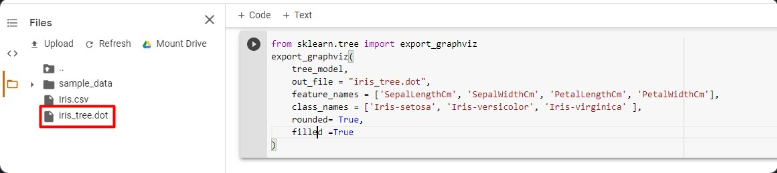

In [56]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_model,
    out_file = "iris_tree.dot",
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ],
    rounded= True,
    filled =True)

Untuk mengunduh berkas iris_tree.dot pada gambar di atas,  dapat melakukan klik kanan pada berkas tersebut kemudian mengunduhnya.

Jika kita ingin melihat visualisasi decision tree, lakukan konversi dot file ke dalam file png menggunakan situs konversi berkas berikut ini : https://onlineconvertfree.com/converter/images/.



contoh hasil visualisasi dari model **decision tree** yang dibuat

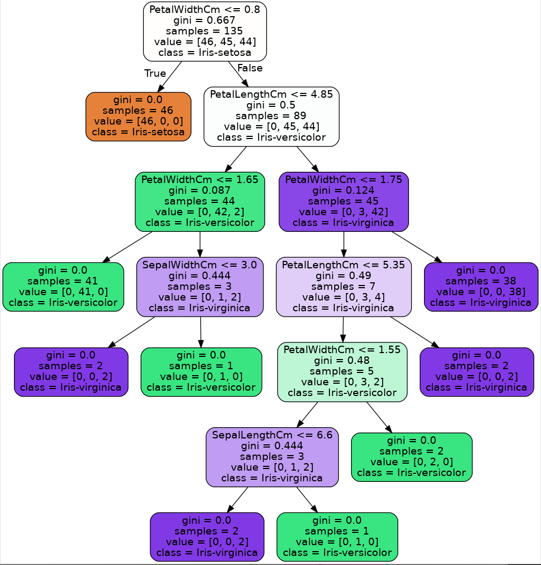